In [1]:
import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
red=gdal.Open('IMG_160808_092611_0000_RED.TIF')
if red is None:
    print('Could not open file')

r=np.array(red.GetRasterBand(1).ReadAsArray(), dtype=float)
nir=gdal.Open('IMG_160808_092611_0000_NIR.TIF')

if nir is None:
    print('Could not open file')

In [36]:
n=np.array(nir.GetRasterBand(1).ReadAsArray(), dtype=float)
geotr=red.GetGeoTransform()
proj=red.GetProjection()
tableshape=r.shape
np.seterr(divide='ignore', invalid='ignore') #Ignore the divided by zero or Nan appears
ndvi=(n-r)/(n+r) # The NDVI formula

In [4]:
driver=gdal.GetDriverByName('GTiff')
dst_ds=driver.Create('ndvi.tif', tableshape[1], tableshape[0], 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform(geotr)
dst_ds.SetProjection(proj)
dst_ds.GetRasterBand(1).WriteArray(ndvi)
dst_ds=None # save, close
print 'The NDVI image is saved.'

The NDVI image is saved.


In [37]:
ndvi[ndvi < -1] = -1
ndvi

array([[-0.17474981, -0.18670886, -0.21048451, ...,  0.18648649,
         0.25203252,  0.15977961],
       [-0.16493314, -0.1826087 , -0.22636103, ...,  0.23173804,
         0.21497585,  0.18912237],
       [-0.18096724, -0.22063492, -0.23602484, ...,  0.20277778,
         0.22938144,  0.21381142],
       ..., 
       [-0.29027468, -0.32779456, -0.32978723, ...,  0.37923947,
         0.41825476,  0.40881764],
       [-0.28097983, -0.30890805, -0.3253012 , ...,  0.38666667,
         0.32088285,  0.27831715],
       [-0.27656123, -0.30098684, -0.32211538, ...,  0.22939424,
         0.14784206,  0.14962121]])

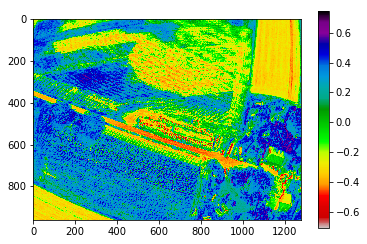

In [38]:
ndvi_plot = plt.imshow(ndvi)
ndvi_plot.set_cmap('nipy_spectral_r')
plt.colorbar()
plt.show()

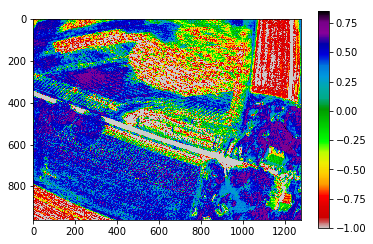

In [30]:
# MSAVI2

msavi2 = ((2*n+1-np.sqrt((2*n+1)**2-8*(n-r)))/2)

msavi2[msavi2 < -1] = -1

msavi2_plot = plt.imshow(msavi2)
msavi2_plot.set_cmap('nipy_spectral_r')
plt.colorbar()
plt.show()

#### Not working

In [ ]:
from PIL import Image

imgR = Image.open("IMG_160808_092611_0000_RED.TIF")
imgG = Image.open("IMG_160808_092611_0000_GRE.TIF")
imgN = Image.open("IMG_160808_092611_0000_NIR.TIF")
arrR = np.asarray(imgR).astype('float64')
arrN = np.asarray(imgN).astype('float64')

num   = (arrR - arrN)
denom = (arrR + arrN)
if denom.any() == 0:    #preventing division by zero.
    denom = [0.000001, 0.000001]
arr_ndvi = num/denom